Import Libraries

In [2]:
# Lets import relevant libraries

import pandas as pd


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

Import the Dataset

In [3]:
students = pd.read_csv(r"C:\Users\admin\Desktop\StudentPerformanceFactors.csv")

## Step 1: Load & Understand the Dataset

In this step, we load the dataset and perform an initial check to understand its structure.  
We examine:
- The number of rows and columns
- The data types of each column
- The presence of missing values  
This helps us plan the necessary preprocessing steps.

In [4]:
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
students.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
print("\n✅ Missing Values in Each Column:")
print(students.isnull().sum())


✅ Missing Values in Each Column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


## Step 2: Handling Missing Values

Before performing data analysis, we need to handle missing values to ensure clean data.  
We will:
1. **Identify missing values** (Already checked in Step 1)
2. **Decide on an imputation strategy**:
   - **Categorical Features** → Fill with the **most frequent (mode) value**.
   - **Numerical Features** → Since no numerical columns have missing values, no action needed.
3. **Verify that all missing values are handled.**


In [8]:
# List of categorical columns with missing values
missing_columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

# Fill missing categorical values with the mode (most frequent value)
for col in missing_columns:
    students[col].fillna(students[col].mode()[0], inplace=True)

# Verify that missing values are handled
print("\n✅ Missing Values After Handling:")
print(students.isnull().sum())


✅ Missing Values After Handling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_7156\1020919814.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  students[col].fillna(students[col].mode()[0], inplace=True)


## Step 3.5: Encoding Categorical Features

Before training the model, we need to convert categorical variables into numerical format.
Since Gradient Boosting cannot handle text values, we apply:
1. **Binary Encoding** → Convert "Yes/No" categories into 1/0.
2. **Label Encoding** → Convert categorical classes into numeric values.


In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Binary Encoding (Yes/No → 1/0)
binary_columns = ['Internet_Access', 'Learning_Disabilities', 'Extracurricular_Activities']
for col in binary_columns:
    students[col] = students[col].map({'Yes': 1, 'No': 0})

# Step 2: Label Encoding for Other Categorical Features
categorical_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home'
]

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_features:
    students[col] = encoder.fit_transform(students[col])

# Confirm that all columns are now numeric
print("\n✅ Data Types After Encoding:")
print(students.dtypes)



✅ Data Types After Encoding:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement           int64
Access_to_Resources            int64
Extracurricular_Activities     int64
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level               int64
Internet_Access                int64
Tutoring_Sessions              int64
Family_Income                  int64
Teacher_Quality                int64
School_Type                   object
Peer_Influence                 int64
Physical_Activity              int64
Learning_Disabilities          int64
Parental_Education_Level       int64
Distance_from_Home             int64
Gender                        object
Exam_Score                     int64
dtype: object


## Step 3: Exploratory Data Analysis (EDA)

Now that we have cleaned the data, we perform **Exploratory Data Analysis (EDA)** to better understand patterns, trends, and relationships.  
EDA will help us:
1. **Check the distribution of Exam Scores** → To understand how student scores are spread.
2. **Visualize Missing Values (Verification)** → To ensure no missing data remains.
3. **Analyze Correlations** → To see relationships between numerical features.
4. **Study the Impact of Study Hours on Exam Scores**.
5. **Study the Effect of Attendance on Exam Scores**.
6. **Analyze the Role of Tutoring in Exam Scores**.
7. **Analyze Motivation Levels vs. Exam Scores**.

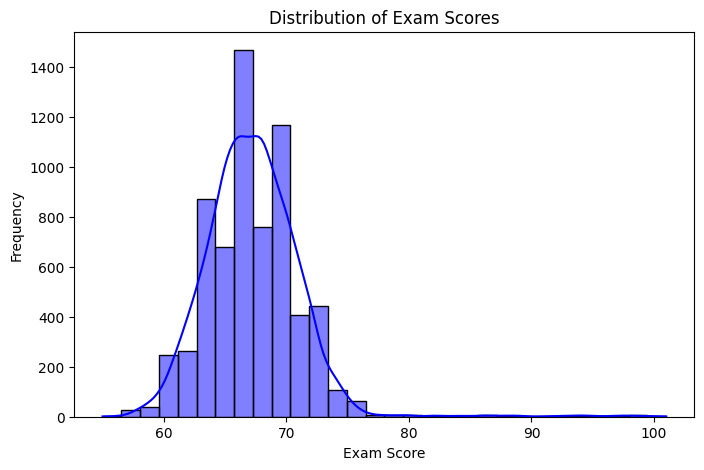

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Exam Scores
plt.figure(figsize=(8, 5))
sns.histplot(students['Exam_Score'], bins=30, kde=True, color="blue")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Frequency")
plt.show()

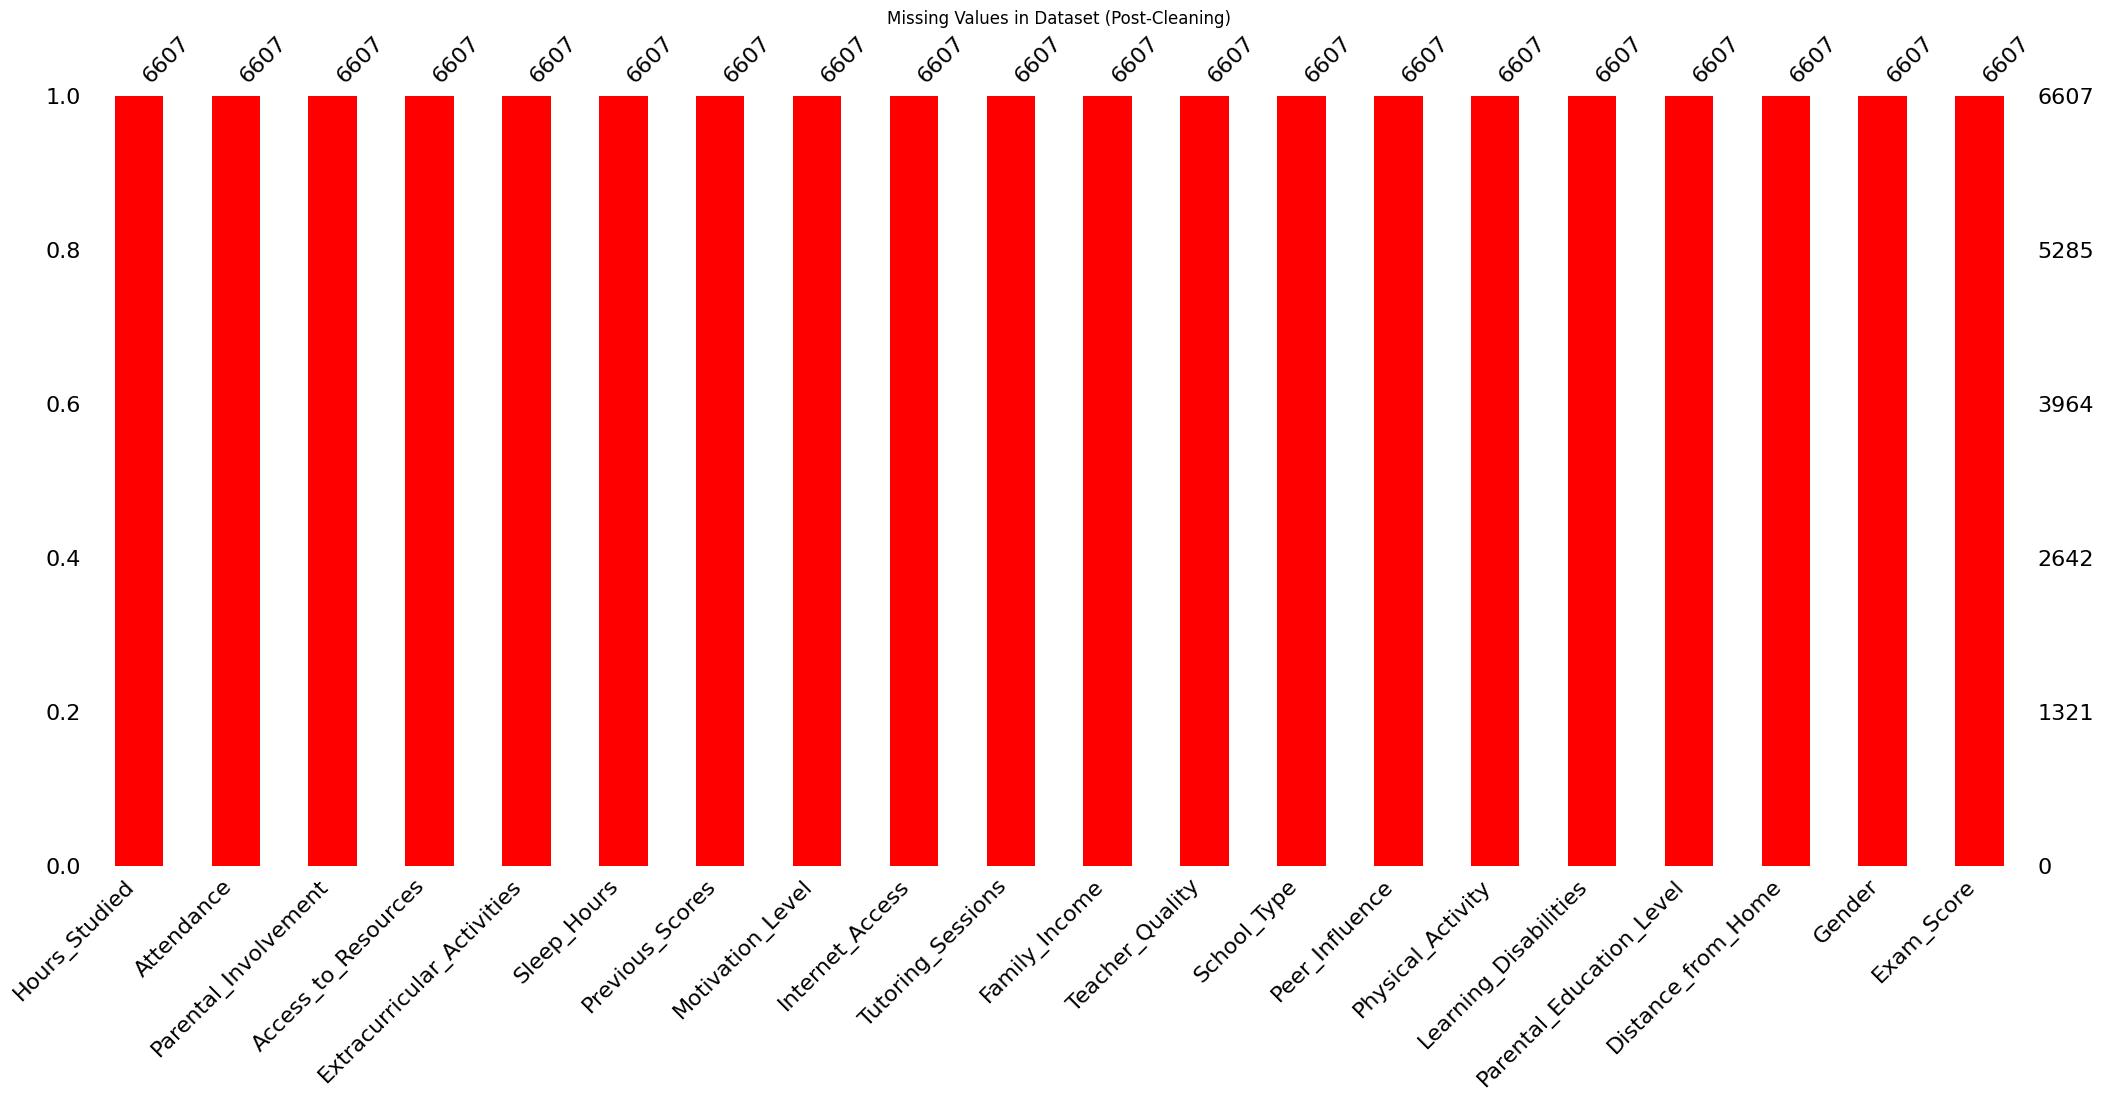

In [11]:
import missingno as msno

# Visualize missing values
plt.figure(figsize=(8, 5))
msno.bar(students, color="red")
plt.title("Missing Values in Dataset (Post-Cleaning)")
plt.show()

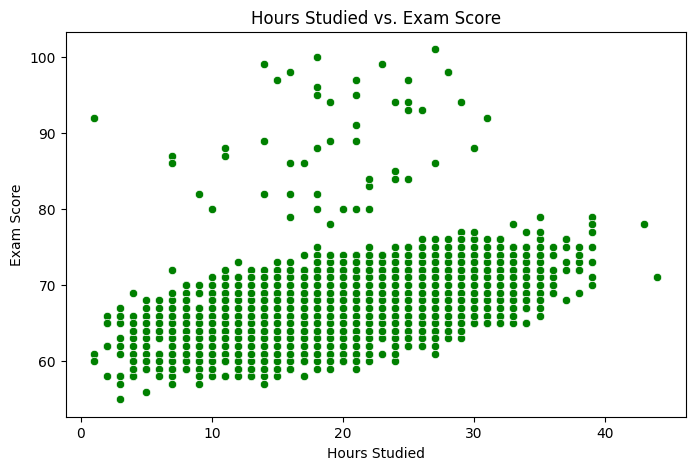

In [12]:
# Scatter plot of Hours Studied vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=students['Hours_Studied'], y=students['Exam_Score'], color="green")
plt.title("Hours Studied vs. Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_7156\2109817468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=students['Tutoring_Sessions'], y=students['Exam_Score'], palette="coolwarm")


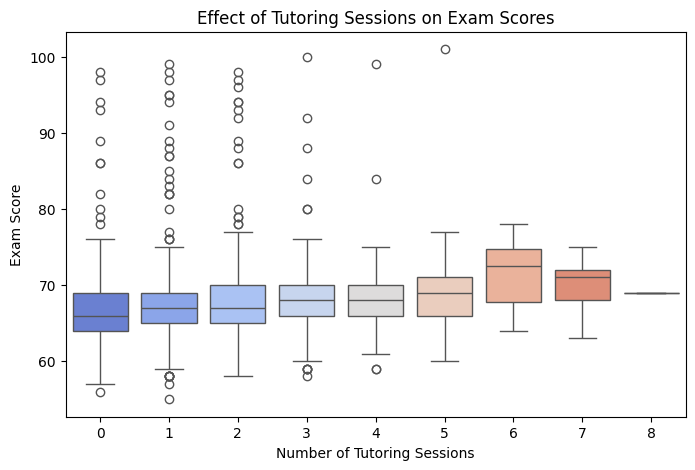

In [13]:
# Boxplot of Tutoring Sessions vs Exam Score
plt.figure(figsize=(8, 5))
sns.boxplot(x=students['Tutoring_Sessions'], y=students['Exam_Score'], palette="coolwarm")
plt.title("Effect of Tutoring Sessions on Exam Scores")
plt.xlabel("Number of Tutoring Sessions")
plt.ylabel("Exam Score")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_7156\4255030130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=students['Motivation_Level'], y=students['Exam_Score'], palette="magma")


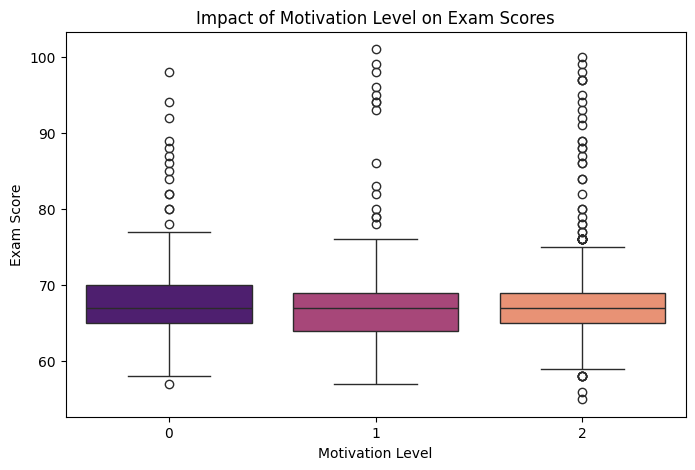

In [14]:
# Boxplot of Motivation Level vs Exam Score
plt.figure(figsize=(8, 5))
sns.boxplot(x=students['Motivation_Level'], y=students['Exam_Score'], palette="magma")
plt.title("Impact of Motivation Level on Exam Scores")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")
plt.show()


## Step 4: Feature Selection & Engineering

Based on the EDA results, we now refine our dataset by:
1. **Dropping Low-Importance Features** → Removing columns that do not contribute significantly to predictions.
2. **Creating New Features** → Engineering additional useful variables.
3. **Scaling Numerical Features** → Standardizing numerical values to improve model performance.


In [15]:
# Features to drop (based on EDA & correlation analysis)
low_importance_features = ['School_Type', 'Learning_Disabilities', 'Gender', 'Extracurricular_Activities', 'Internet_Access']

# Drop low-importance features
students = students.drop(columns=low_importance_features)

# Display updated feature set
print(f"\n✅ Updated feature set size: {students.shape}")
print("\n✅ First 5 rows after dropping low-importance features:")
print(students.head())


✅ Updated feature set size: (6607, 15)

✅ First 5 rows after dropping low-importance features:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0            7               73                 1                  0   
1            8               59                 1                  2   
2            7               91                 2                  2   
3            8               98                 2                  1   
4            6               65                 2                  3   

   Family_Income  Te

In [16]:
# Create new meaningful features
students['Study_Efficiency'] = students['Hours_Studied'] / (students['Attendance'] + 1)  # Avoid division by zero
students['Improvement_Rate'] = students['Exam_Score'] - students['Previous_Scores']  # How much they improved
students['Tutoring_Effect'] = students['Tutoring_Sessions'] / (students['Hours_Studied'] + 1)

# Check the new features
print("\n✅ First 5 rows after feature engineering:")
print(students[['Study_Efficiency', 'Improvement_Rate', 'Tutoring_Effect']].head())



✅ First 5 rows after feature engineering:
   Study_Efficiency  Improvement_Rate  Tutoring_Effect
0          0.270588                -6         0.000000
1          0.292308                 2         0.100000
2          0.242424               -17         0.080000
3          0.322222               -27         0.033333
4          0.204301                 5         0.150000


In [17]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                      'Tutoring_Sessions', 'Physical_Activity', 'Study_Efficiency', 
                      'Improvement_Rate', 'Tutoring_Effect']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
students[numerical_features] = scaler.fit_transform(students[numerical_features])

# Display first few rows after scaling
print("\n✅ First 5 rows after scaling numerical features:")
print(students.head())


✅ First 5 rows after scaling numerical features:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375                     1                    0   
1      -0.162822   -1.383736                     1                    2   
2       0.671882    1.560853                     2                    2   
3       1.506587    0.781403                     1                    2   
4      -0.162822    1.041220                     2                    2   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0    -0.019796        -0.143800                 1          -1.213934   
1     0.661399        -1.116110                 1           0.411451   
2    -0.019796         1.106313                 2           0.411451   
3     0.661399         1.592469                 2          -0.401242   
4    -0.700990        -0.699406                 2           1.224144   

   Family_Income  Teacher_Quality  Peer_Influence  Physical_Activi

## Step 5: Splitting Data for Model Training

To ensure proper evaluation, we split the dataset into:
- **80% Training Data** → Used to train the model.
- **20% Testing Data** → Used to assess model performance.

This prevents **overfitting** and ensures the model can generalize to unseen data.


In [18]:
from sklearn.model_selection import train_test_split

# Define target variable (Exam_Score) and features (X)
X = students.drop(columns=['Exam_Score'])  # Features
y = students['Exam_Score']  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"✅ Training set size: {X_train.shape}")
print(f"✅ Testing set size: {X_test.shape}")


✅ Training set size: (5285, 17)
✅ Testing set size: (1322, 17)


## Step 7: Training Gradient Boosting

Now that we have selected **Gradient Boosting**, we train it using default hyperparameters.
This step will:
- Fit the model on the training data.
- Evaluate its performance using test data.
- Measure **MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² Score**.

This will give us a **baseline performance** before fine-tuning.

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Gradient Boosting with default parameters
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred = gb_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print model evaluation results
print("\n🚀 Gradient Boosting Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


🚀 Gradient Boosting Model Performance:
Mean Absolute Error (MAE): 0.7854
Root Mean Squared Error (RMSE): 1.2497
R² Score: 0.8895


## Step 8: Hyperparameter Tuning for Gradient Boosting

Now that we have trained the Gradient Boosting model, we fine-tune its hyperparameters.  
We use **RandomizedSearchCV** to efficiently find the best settings, optimizing:
- **n_estimators** (number of trees)
- **learning_rate** (step size for learning)
- **max_depth** (tree complexity control)
- **min_samples_split** (minimum data points needed to split a node)
- **min_samples_leaf** (minimum data points in a leaf)

Tuning will **improve accuracy and prevent overfitting**.

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define optimized hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.15],  # Learning rate options
    'max_depth': [3, 5, 7],  # Tree depth options
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required in a leaf node
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    gb_model, param_distributions=param_dist,
    n_iter=10,  # Search 10 random combinations
    cv=3,  # 3-fold cross-validation
    scoring='r2',
    n_jobs=-1, verbose=1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best model parameters
best_params = random_search.best_params_
print("\n✅ Best Parameters for Gradient Boosting:", best_params)

# Train the final optimized model
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = best_gb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print final performance
print("\n🚀 Optimized Gradient Boosting Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

✅ Best Parameters for Gradient Boosting: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.15}

🚀 Optimized Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.5805
Root Mean Squared Error (RMSE): 0.9083
R² Score: 0.9416


In [22]:
import joblib
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
students[numerical_features] = scaler.fit_transform(students[numerical_features])

# Save the trained scaler
joblib.dump(scaler, "scaler.pkl")

# Save the model
joblib.dump(best_gb_model, "model.pkl")



['model.pkl']